# Stacked Autoencoder

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

/Users/johnleonard/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
tf.reset_default_graph() 

## Parameters

In [6]:
n_inputs = 784
n_neurons_HL1 = int(n_inputs/2)
n_neurons_HL2 = int(n_neurons_HL1/2)
n_neurons_HL3 = n_neurons_HL1
n_outputs = n_inputs

learning_rate = 0.01

activation_fxn = tf.nn.relu

### Placeholder

In [7]:
x = tf.placeholder(tf.float32,shape=[None, n_inputs])

### Weights

Initializer capable of adapting its scale to the shape of weights tensors.

With `distribution="normal"`, samples are drawn from a truncated normal
distribution centered on zero, with `stddev = sqrt(scale / n)`
where n is:
  - number of input units in the weight tensor, if mode = "fan_in"
  - number of output units, if mode = "fan_out"
  - average of the numbers of input and output units, if mode = "fan_avg"

With `distribution="uniform"`, samples are drawn from a uniform distribution
within [-limit, limit], with `limit = sqrt(3 * scale / n)`.


In [8]:
initializer = tf.variance_scaling_initializer() #adapts scale to the shape of the wieghts tensor

In [9]:
w1 = tf.Variable(initializer([n_inputs, n_neurons_HL1]),dtype=tf.float32)
w2 = tf.Variable(initializer([n_neurons_HL1, n_neurons_HL2]),dtype=tf.float32)
w3 = tf.Variable(initializer([n_neurons_HL2, n_neurons_HL3]),dtype=tf.float32)
w4 = tf.Variable(initializer([n_neurons_HL3, n_outputs]),dtype=tf.float32)

### Biases

In [11]:
b1 = tf.Variable(tf.zeros(n_neurons_HL1))
b2 = tf.Variable(tf.zeros(n_neurons_HL2))
b3 = tf.Variable(tf.zeros(n_neurons_HL3))
b4 = tf.Variable(tf.zeros(n_outputs))

### Activation Function and Layers

In [12]:
activation_fxn = tf.nn.relu

In [13]:
HL1 = activation_fxn(tf.matmul(x,w1)+b1)
HL2 = activation_fxn(tf.matmul(HL1,w2)+b2)
HL3 = activation_fxn(tf.matmul(HL2,w3)+b3)
output_layer = activation_fxn(tf.matmul(HL3,w4)+b4)

### Loss Function

In [14]:
loss = tf.reduce_mean(tf.square(x - output_layer))

### Optimizer

In [15]:
optimizer = tf.train.AdamOptimizer(learning_rate)

minimizer = optimizer.minimize(loss)

### Intialize Variables

In [16]:
init = tf.global_variables_initializer()

### Run the Model

In [ ]:
from tensorflow import sav

In [22]:
n_epochs = 5
batch_size = 150

saver = tf.train.Saver()

with tf.Session() as sess:
    
    sess.run(init)
    
    for epoch in range(n_epochs):
        n_batchs = mnist.train.num_examples // batch_size
        
        for iteration in range(n_batchs):
            x_batch, y_batch = mnist.train.next_batch(batch_size)
            
            sess.run(minimizer, feed_dict = {x: x_batch})
        
        train_loss = loss.eval(feed_dict={x:x_batch})
        
        print("Epoch:{}\t Loss:{}".format(epoch, train_loss))
        
    saver.save(sess,'./example_stacked_autoencoder.ckpt')

Epoch:0	 Loss:0.02506616711616516
Epoch:1	 Loss:0.023722490295767784
Epoch:2	 Loss:0.021900678053498268
Epoch:3	 Loss:0.022114679217338562
Epoch:4	 Loss:0.019307712092995644


## Test Autoencoder output on Test Data

In [25]:
n_test_image = 10

with tf.Session() as sess:
    saver.restore(sess,'./example_stacked_autoencoder.ckpt')
    
    results = output_layer.eval(feed_dict={x:mnist.test.images[:n_test_image]})
    

INFO:tensorflow:Restoring parameters from ./example_stacked_autoencoder.ckpt


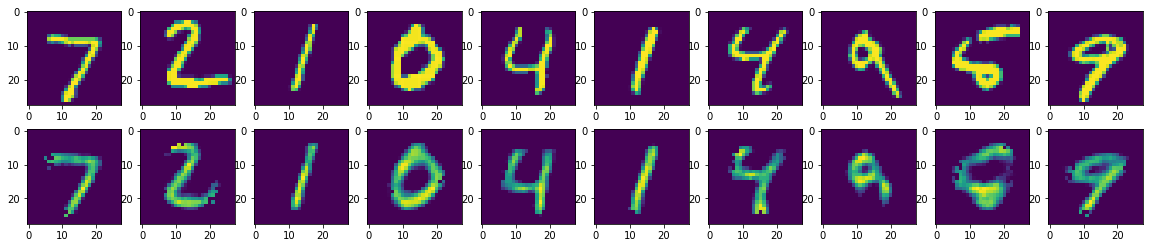

In [28]:
f, a = plt.subplots(2,10, figsize = (20,4))
for i in range(n_test_image):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i],(28,28)))